In [1]:
import tensorflow.keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator w/ no augmentation
#Scaling for pixels
piece_train_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_test_datagen = ImageDataGenerator(
    rescale = 1./255)
piece_valid_datagen = ImageDataGenerator(
    rescale = 1./255)


#Flow data from directory

piece_train_iter = piece_train_datagen.flow_from_directory(
    directory = '../data/piece_data/train',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

piece_test_iter = piece_test_datagen.flow_from_directory(
    directory = '../data/piece_data/test',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle=False,
    seed=42
)

piece_valid_iter = piece_valid_datagen.flow_from_directory(
    directory = '../data/piece_data/valid',
    target_size = (135,135),
    color_mode = 'grayscale',
    class_mode = 'categorical',
    seed=42
)

Found 1227 images belonging to 7 classes.
Found 335 images belonging to 7 classes.
Found 331 images belonging to 7 classes.


In [3]:
#Define NN architecture

from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

piece_model = Sequential()
piece_model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(135, 135, 1)))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(BatchNormalization())
piece_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
piece_model.add(MaxPooling2D(pool_size=2))
piece_model.add(GlobalAveragePooling2D())
piece_model.add(Dense(7, activation='softmax'))


piece_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 135, 135, 16)      80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 67, 67, 16)        0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 67, 67, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 33, 33, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        8

In [4]:
# compile the model
piece_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

STEP_SIZE_TRAIN = piece_train_iter.n/piece_train_iter.batch_size
STEP_SIZE_VALID = piece_valid_iter.n/piece_valid_iter.batch_size



In [5]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='baseline_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
piece_hist = piece_model.fit_generator(generator=piece_train_iter, 
                          steps_per_epoch=STEP_SIZE_TRAIN, 
                          validation_data=piece_valid_iter, 
                          validation_steps=STEP_SIZE_VALID,
                          epochs=100, 
                          callbacks=[checkpointer], 
                          verbose=2)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 2.06299, saving model to baseline_model.weights.best.hdf5
39/38 - 12s - loss: 1.8292 - accuracy: 0.2747 - val_loss: 2.0630 - val_accuracy: 0.1329
Epoch 2/100

Epoch 00002: val_loss improved from 2.06299 to 2.05952, saving model to baseline_model.weights.best.hdf5
39/38 - 8s - loss: 1.6932 - accuracy: 0.3317 - val_loss: 2.0595 - val_accuracy: 0.1541
Epoch 3/100

Epoch 00003: val_loss did not improve from 2.05952
39/38 - 7s - loss: 1.6446 - accuracy: 0.3374 - val_loss: 2.0624 - val_accuracy: 0.1903
Epoch 4/100

Epoch 00004: val_loss improved from 2.05952 to 2.05461, saving model to baseline_model.weights.best.hdf5
39/38 - 7s - loss: 1.5892 - accuracy: 0.3667 - val_loss: 2.0546 - val_accuracy: 0.1722
Epoch 5/100

Epoch 00005: val_loss did not improve from 2.05461
39/38 - 8s - loss: 1.5685 - accuracy: 0.3749 - val_loss: 2.1015 - val_accuracy: 0.1692
Epoch 6/100

Epoch 00006: val_loss did not improve from 2.05461
39/38 - 7s - loss: 1.5

Epoch 53/100

Epoch 00053: val_loss did not improve from 1.43379
39/38 - 7s - loss: 1.0632 - accuracy: 0.6178 - val_loss: 8.3208 - val_accuracy: 0.2810
Epoch 54/100

Epoch 00054: val_loss did not improve from 1.43379
39/38 - 7s - loss: 1.0659 - accuracy: 0.5933 - val_loss: 1.5724 - val_accuracy: 0.4532
Epoch 55/100

Epoch 00055: val_loss did not improve from 1.43379
39/38 - 8s - loss: 1.0711 - accuracy: 0.5949 - val_loss: 1.4491 - val_accuracy: 0.4350
Epoch 56/100

Epoch 00056: val_loss did not improve from 1.43379
39/38 - 7s - loss: 1.0743 - accuracy: 0.6064 - val_loss: 2.6814 - val_accuracy: 0.3716
Epoch 57/100

Epoch 00057: val_loss did not improve from 1.43379
39/38 - 7s - loss: 1.0748 - accuracy: 0.6080 - val_loss: 2.6774 - val_accuracy: 0.3505
Epoch 58/100

Epoch 00058: val_loss did not improve from 1.43379
39/38 - 7s - loss: 1.0501 - accuracy: 0.6031 - val_loss: 3.6548 - val_accuracy: 0.3414
Epoch 59/100

Epoch 00059: val_loss did not improve from 1.43379
39/38 - 7s - loss: 1.03

In [6]:
#Reset test iterator
STEP_SIZE_TEST = piece_test_iter.n/piece_test_iter.batch_size
piece_test_iter.reset()
# load the weights that yielded the best validation accuracy
piece_model.load_weights('baseline_model.weights.best.hdf5')
# evaluate and print test accuracy
score = piece_model.evaluate_generator(generator=piece_test_iter,steps=STEP_SIZE_TEST)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.45074627


In [7]:
piece_test_iter.reset()
piece_pred = piece_model.predict_generator(piece_test_iter,steps=STEP_SIZE_TEST,verbose=1)

11/10 [===============================] - 1s 54ms/step


In [8]:
predicted_class_indices=np.argmax(piece_pred,axis=1)
print(predicted_class_indices)

[0 0 3 0 5 0 0 3 0 5 5 2 0 5 5 5 0 0 2 0 0 0 0 2 2 0 4 0 2 0 2 0 2 5 0 2 0
 2 2 2 0 0 2 3 0 2 2 0 0 1 1 0 4 0 4 2 4 1 5 5 4 1 2 2 0 2 0 1 5 1 5 0 4 1
 2 1 5 0 5 5 0 2 0 3 3 1 0 1 5 5 1 2 0 0 5 1 0 2 5 3 3 3 2 2 0 0 0 0 5 5 2
 2 0 2 2 2 2 0 4 5 2 0 2 0 0 0 2 0 2 0 2 0 0 2 5 2 2 2 2 2 2 3 3 3 3 3 3 3
 0 3 2 3 3 3 5 5 5 0 5 0 2 5 5 3 0 3 2 5 5 3 2 2 2 0 5 0 2 5 0 1 0 0 0 2 2
 3 3 5 5 5 2 5 1 0 1 1 5 1 5 2 1 2 3 4 2 3 5 3 4 1 5 4 1 0 0 4 2 1 0 0 4 4
 4 5 5 2 3 5 2 5 3 5 1 3 2 6 3 3 0 3 3 4 5 3 3 3 3 3 3 3 5 2 3 2 5 5 5 2 5
 5 5 2 5 5 3 2 2 5 0 5 2 5 2 3 5 5 5 5 5 5 5 5 5 2 1 6 3 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6]


In [9]:
labels = (piece_test_iter.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
truth =  [labels[k] for k in piece_test_iter.classes]

In [10]:
[labels[k] for k in piece_test_iter.classes]


['bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'bishop',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'king',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',
 'knight',

In [11]:
piece_test_iter.filenames

['bishop/1538777310.1624303.jpg',
 'bishop/1538777556.4695792.jpg',
 'bishop/1538777675.2653856.jpg',
 'bishop/1538777891.4931645.jpg',
 'bishop/1538778091.9695802.jpg',
 'bishop/1538778093.2397656.jpg',
 'bishop/1538778214.3746974.jpg',
 'bishop/1538778215.8878355.jpg',
 'bishop/1538778410.6081142.jpg',
 'bishop/1538778427.8668559.jpg',
 'bishop/1538778537.1458335.jpg',
 'bishop/1538778538.3017461.jpg',
 'bishop/1538778643.4925923.jpg',
 'bishop/1538778653.1963263.jpg',
 'bishop/1538778656.6147914.jpg',
 'bishop/1538778729.1405196.jpg',
 'bishop/1538778752.467536.jpg',
 'bishop/1538778832.1937056.jpg',
 'bishop/1538778833.610855.jpg',
 'bishop/1538778878.3252861.jpg',
 'bishop/1538778958.324379.jpg',
 'bishop/1538779144.9958382.jpg',
 'bishop/1538779155.2682924.jpg',
 'bishop/1538779417.7487714.jpg',
 'bishop/1538779519.5865016.jpg',
 'bishop/1539017656.2202125_22.jpg',
 'bishop/1539017656.6888525_5.jpg',
 'bishop/1539023140.397658.jpg',
 'bishop/1539023363.830272.jpg',
 'bishop/15390

In [12]:
filenames=piece_test_iter.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Truth": truth,
                      "Predictions":predictions})

In [13]:
results

,Filename,Predictions,Truth
0,bishop/1538777310.1624303.jpg,bishop,bishop
1,bishop/1538777556.4695792.jpg,bishop,bishop
2,bishop/1538777675.2653856.jpg,pawn,bishop
3,bishop/1538777891.4931645.jpg,bishop,bishop
4,bishop/1538778091.9695802.jpg,rook,bishop
5,bishop/1538778093.2397656.jpg,bishop,bishop
6,bishop/1538778214.3746974.jpg,bishop,bishop
7,bishop/1538778215.8878355.jpg,pawn,bishop
8,bishop/1538778410.6081142.jpg,bishop,bishop
9,bishop/1538778427.8668559.jpg,rook,bishop


In [14]:
from sklearn.metrics import classification_report
class_report = classification_report(piece_test_iter.classes,predicted_class_indices)
print(class_report)

              precision    recall  f1-score   support

           0       0.33      0.47      0.39        47
           1       0.35      0.24      0.29        33
           2       0.34      0.38      0.36        61
           3       0.36      0.31      0.33        51
           4       0.47      0.22      0.30        32
           5       0.39      0.43      0.41        61
           6       0.98      0.98      0.98        50

   micro avg       0.45      0.45      0.45       335
   macro avg       0.46      0.43      0.44       335
weighted avg       0.46      0.45      0.45       335



In [15]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(piece_test_iter.classes,predicted_class_indices)
print(cmatrix)
print(labels)

[[22  0 14  3  1  7  0]
 [ 8  8  5  0  5  7  0]
 [20  4 23  5  1  8  0]
 [10  1 10 16  0 14  0]
 [ 5  8  4  3  7  5  0]
 [ 2  2 12 17  1 26  1]
 [ 0  0  0  1  0  0 49]]
{0: 'bishop', 1: 'king', 2: 'knight', 3: 'pawn', 4: 'queen', 5: 'rook', 6: 'square'}


In [19]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

1.3545717303495186


In [29]:
piece_hist.history

{'accuracy': [0.2746536,
  0.33170334,
  0.3374083,
  0.36674815,
  0.37489814,
  0.40994295,
  0.40260798,
  0.40912795,
  0.41157293,
  0.4417278,
  0.43683782,
  0.47351262,
  0.44498777,
  0.46699268,
  0.4604727,
  0.4604727,
  0.48247758,
  0.4775876,
  0.50448245,
  0.51426244,
  0.4775876,
  0.5183374,
  0.5191524,
  0.50611246,
  0.5167074,
  0.54441726,
  0.5175224,
  0.5215974,
  0.5427873,
  0.54686224,
  0.5599022,
  0.5631622,
  0.5590872,
  0.55419725,
  0.55664223,
  0.5713121,
  0.55093724,
  0.5574572,
  0.5582722,
  0.5770171,
  0.5770171,
  0.5762021,
  0.594132,
  0.594132,
  0.5819071,
  0.58272207,
  0.60472697,
  0.58842707,
  0.59494704,
  0.5819071,
  0.60717195,
  0.594132,
  0.6177669,
  0.59331703,
  0.59494704,
  0.606357,
  0.607987,
  0.60309696,
  0.63080686,
  0.6267319,
  0.6202119,
  0.6120619,
  0.63162184,
  0.62510186,
  0.6267319,
  0.6177669,
  0.6340668,
  0.62917686,
  0.6487368,
  0.6210269,
  0.6218419,
  0.64140177,
  0.65199673,
  0.650366

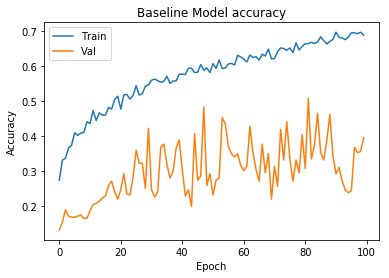

In [30]:
plt.plot(piece_hist.history['accuracy'])
plt.plot(piece_hist.history['val_accuracy'])
plt.title('Baseline Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

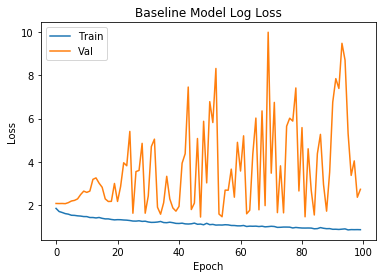

In [31]:
plt.plot(piece_hist.history['loss'])
plt.plot(piece_hist.history['val_loss'])
plt.title('Baseline Model Log Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

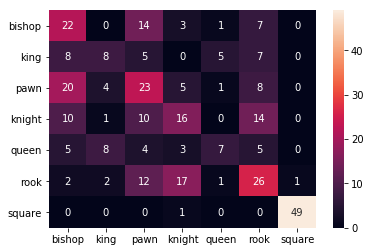

In [33]:
import seaborn as sns
ax = sns.heatmap(cmatrix, annot=True, xticklabels=['bishop','king','pawn','knight','queen','rook','square'],yticklabels=['bishop','king','pawn','knight','queen','rook','square'])

In [34]:
from sklearn.metrics import log_loss
log_loss_result = log_loss(piece_test_iter.classes,piece_pred)
print(log_loss_result)

1.3545717303495186
